In [1]:
%matplotlib notebook

In [2]:
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!ls ml-100k/

allbut.pl
data
mku.sh
Movie_Id_Titles
movie_names
README
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


In [4]:
!head -n10 ./ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [5]:
f=open('./ml-100k/u.data')

In [6]:
transactions=defaultdict(lambda:'')

In [7]:
movies_liked_by_user=defaultdict(lambda:[])

In [8]:
for row in f:
    row=row.strip().split()
    transactions[(row[1],row[2])]=transactions[(row[1],row[2])]+row[0]+','
    if int(row[2])>4:
        movies_liked_by_user[row[0]].append(row[1])
f.close()        

In [9]:
movies_liked_by_user['225']

['237',
 '480',
 '136',
 '172',
 '418',
 '22',
 '1203',
 '427',
 '604',
 '606',
 '705',
 '215',
 '194',
 '510',
 '603',
 '482',
 '478',
 '98']

In [10]:
len(transactions)

6714

In [11]:
dkeys=transactions.keys()

In [12]:
transactions[('242', '3')]

'196,63,154,21,417,202,537,617,461,139,473,206,866,937,758,871,279,500,721,'

In [13]:
with open('./ml-100k/data','w') as file:
    for key,value in transactions.items():
        file.write(value[:-1]+'\n')

In [14]:
!head -n3 ./ml-100k/u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116


In [15]:
similarity_dict=defaultdict(lambda:{})
count_uid={}

In [16]:
with open('./ml-100k/data','r') as file:
    freader=csv.reader(file)
    for row in freader:
        for pos,x in enumerate(row):
            for y in row[pos:]:
                if x!=y:
                    similarity_dict[x][y]=similarity_dict[x].get(y,0)+1
                    similarity_dict[y][x]=similarity_dict[y].get(x,0)+1
                else:
                    count_uid[x]=count_uid.get(x,0)+1

In [17]:
similarity_dict['1']

{'210': 29,
 '87': 32,
 '276': 72,
 '43': 34,
 '11': 29,
 '406': 44,
 '268': 46,
 '435': 59,
 '389': 29,
 '455': 30,
 '805': 37,
 '378': 49,
 '417': 42,
 '621': 30,
 '766': 22,
 '92': 61,
 '345': 37,
 '897': 30,
 '804': 49,
 '299': 36,
 '216': 24,
 '58': 31,
 '279': 36,
 '217': 10,
 '215': 26,
 '13': 55,
 '158': 27,
 '103': 7,
 '328': 36,
 '298': 22,
 '293': 44,
 '119': 23,
 '327': 23,
 '263': 20,
 '363': 42,
 '194': 39,
 '275': 16,
 '429': 66,
 '10': 26,
 '458': 24,
 '454': 24,
 '60': 41,
 '343': 46,
 '301': 53,
 '117': 24,
 '144': 30,
 '479': 47,
 '313': 34,
 '124': 7,
 '425': 26,
 '323': 16,
 '484': 29,
 '296': 28,
 '346': 31,
 '606': 42,
 '178': 43,
 '608': 23,
 '659': 29,
 '586': 16,
 '700': 6,
 '538': 12,
 '573': 10,
 '442': 27,
 '632': 21,
 '676': 14,
 '96': 19,
 '748': 24,
 '671': 23,
 '44': 37,
 '201': 35,
 '757': 36,
 '625': 16,
 '495': 29,
 '883': 37,
 '249': 30,
 '896': 45,
 '536': 25,
 '847': 20,
 '833': 24,
 '758': 58,
 '295': 41,
 '693': 17,
 '643': 45,
 '109': 34,
 '751

In [18]:
max(similarity_dict['1'].keys(),key=lambda x:similarity_dict['1'][x])

'276'

In [19]:
similarity_dict['1']['276']

72

In [20]:
len(count_uid)#no of users

943

In [21]:
max(count_uid.keys(),key=lambda x:count_uid[x])

'405'

In [22]:
max(count_uid.values())

737

In [23]:
count_uid['943']

168

<IPython.core.display.Javascript object>


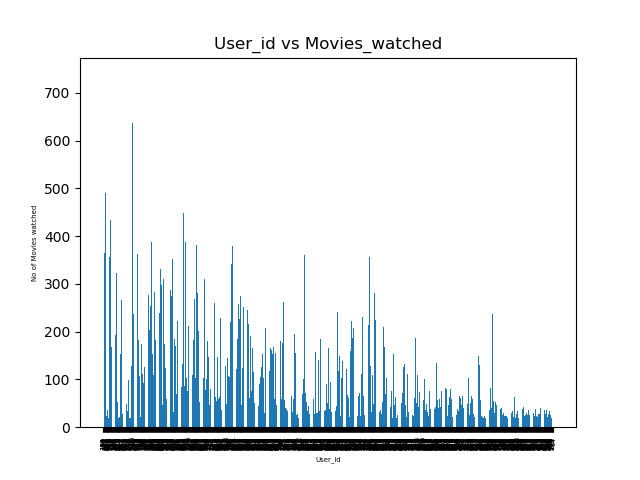

In [24]:
index = np.arange(len(count_uid))
label=count_uid.keys()
return_values=plt.bar(index, count_uid.values())
plt.xlabel('User_id', fontsize=5)
plt.ylabel('No of Movies watched', fontsize=5)
plt.xticks(index, label, fontsize=5, rotation=90)
plt.title('User_id vs Movies_watched')
plt.show()

In [29]:
from apyori import apriori
def data_generator(filename):
    def data_gen():
        with open(filename) as file:
            for line in file:
                yield tuple(k for k in line.strip().split(','))      
    return data_gen()

In [30]:
userids_transactions = data_generator('./ml-100k/data')
results = list(apriori(userids_transactions, min_support=0.01, min_confidence=0.03))

In [31]:
results[-5:-1]

[RelationRecord(items=frozenset({'916', '896'}), support=0.01012809055704498, ordered_statistics=[OrderedStatistic(items_base=frozenset({'896'}), items_add=frozenset({'916'}), confidence=0.1878453038674033, lift=3.9785279815954127), OrderedStatistic(items_base=frozenset({'916'}), items_add=frozenset({'896'}), confidence=0.21451104100946372, lift=3.9785279815954127)]),
 RelationRecord(items=frozenset({'896', '92'}), support=0.01236222817992255, ordered_statistics=[OrderedStatistic(items_base=frozenset({'896'}), items_add=frozenset({'92'}), confidence=0.2292817679558011, lift=3.9675200774619808), OrderedStatistic(items_base=frozenset({'92'}), items_add=frozenset({'896'}), confidence=0.21391752577319587, lift=3.9675200774619808)]),
 RelationRecord(items=frozenset({'916', '92'}), support=0.01385165326184093, ordered_statistics=[OrderedStatistic(items_base=frozenset({'916'}), items_add=frozenset({'92'}), confidence=0.29337539432176657, lift=5.076604117207063), OrderedStatistic(items_base=fr

In [32]:
similarity_dict={}

In [33]:
for x in sorted(results,key=lambda x:x[1]):
    if len(x[0])>1:
        it=iter(x[0])
        a=next(it)
        b=next(it)
        similarity_dict[a]=(b,x[1])
        similarity_dict[b]=(a,x[1])

In [34]:
print(similarity_dict)

{'13': ('276', 0.014298480786416443), '406': ('234', 0.01236222817992255), '85': ('537', 0.013106940720881739), '429': ('276', 0.015490020851951147), '151': ('450', 0.012511170688114389), '184': ('85', 0.010425975573428656), '378': ('276', 0.015341078343759309), '381': ('189', 0.01012809055704498), '189': ('381', 0.01012809055704498), '880': ('276', 0.01817098599940423), '222': ('276', 0.014149538278224605), '896': ('92', 0.01236222817992255), '59': ('450', 0.014298480786416443), '271': ('450', 0.011766458147155198), '293': ('655', 0.016979445933869526), '92': ('276', 0.01876675603217158), '537': ('655', 0.022341376228775692), '299': ('655', 0.01012809055704498), '655': ('537', 0.022341376228775692), '301': ('276', 0.01236222817992255), '303': ('276', 0.022937146261543043), '716': ('450', 0.012511170688114389), '308': ('276', 0.01668156091748585), '561': ('537', 0.016979445933869526), '311': ('450', 0.014447423294608281), '7': ('450', 0.016383675901102176), '846': ('450', 0.01593684837

In [35]:
!head -n3 ml-100k/Movie_Id_Titles

item_id,title
1,Toy Story (1995)
2,GoldenEye (1995)


In [38]:
movieid_to_name={}
with open('./ml-100k/Movie_Id_Titles','r',encoding='utf-8') as f:
    f=csv.reader(f)
    next(f)
    for line in f:
        movieid_to_name[line[0]]=line[1]

In [39]:
movieid_to_name

{'1': 'Toy Story (1995)',
 '2': 'GoldenEye (1995)',
 '3': 'Four Rooms (1995)',
 '4': 'Get Shorty (1995)',
 '5': 'Copycat (1995)',
 '6': 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7': 'Twelve Monkeys (1995)',
 '8': 'Babe (1995)',
 '9': 'Dead Man Walking (1995)',
 '10': 'Richard III (1995)',
 '11': 'Seven (Se7en) (1995)',
 '12': 'Usual Suspects, The (1995)',
 '13': 'Mighty Aphrodite (1995)',
 '14': 'Postino, Il (1994)',
 '15': "Mr. Holland's Opus (1995)",
 '16': 'French Twist (Gazon maudit) (1995)',
 '17': 'From Dusk Till Dawn (1996)',
 '18': 'White Balloon, The (1995)',
 '19': "Antonia's Line (1995)",
 '20': 'Angels and Insects (1995)',
 '21': 'Muppet Treasure Island (1996)',
 '22': 'Braveheart (1995)',
 '23': 'Taxi Driver (1976)',
 '24': 'Rumble in the Bronx (1995)',
 '25': 'Birdcage, The (1996)',
 '26': 'Brothers McMullen, The (1995)',
 '27': 'Bad Boys (1995)',
 '28': 'Apollo 13 (1995)',
 '29': 'Batman Forever (1995)',
 '30': 'Belle de jour (1967)',
 '31': 'Crimson Tide

In [40]:
for userid1,tp in similarity_dict.items():
    print(f'userid "{userid1}" is having similar liking of movies as userid "{tp[0]}" with support value of this relationship as {tp[1]} \n and the movies recommended for userid "{userid1}" are below'.upper())
    for movieids in movies_liked_by_user[tp[0]][:5]:
        print(movieid_to_name[movieids])
    print('*'*100)    

USERID "13" IS HAVING SIMILAR LIKING OF MOVIES AS USERID "276" WITH SUPPORT VALUE OF THIS RELATIONSHIP AS 0.014298480786416443 
 AND THE MOVIES RECOMMENDED FOR USERID "13" ARE BELOW
Shawshank Redemption, The (1994)
Return of the Jedi (1983)
Mary Poppins (1964)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)
One Flew Over the Cuckoo's Nest (1975)
****************************************************************************************************
USERID "406" IS HAVING SIMILAR LIKING OF MOVIES AS USERID "234" WITH SUPPORT VALUE OF THIS RELATIONSHIP AS 0.01236222817992255 
 AND THE MOVIES RECOMMENDED FOR USERID "406" ARE BELOW
Singin' in the Rain (1952)
Citizen Kane (1941)
Treasure of the Sierra Madre, The (1948)
Boys, Les (1997)
Babe (1995)
****************************************************************************************************
USERID "85" IS HAVING SIMILAR LIKING OF MOVIES AS USERID "537" WITH SUPPORT VALUE OF THIS RELATIONSHIP AS 0.01310694072088